In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt

## Raw DataFrames

In [2]:
# global land temperature data by city, with latitude/longitude values
filename = 'Global-Land-Temperatures-By-City.csv'
temp_df = pd.read_csv(filename)

In [3]:
# US federal emergency data, join on county
filename1 = 'federal_emergencies.csv'
disaster_df = pd.read_csv(filename1)

In [4]:
# data of latitude/longitude and county to merge two dataframes
filename2 = 'zip_codes_states.csv'
us_join = pd.read_csv(filename2)

## Cleaning steps

In [5]:
temp_us = temp_df[temp_df['Country'] == 'United States']

In [6]:
# temp_df: drop all countries except US and drop NaN values
temp_us = temp_df[temp_df['Country'] == 'United States'].dropna()

In [7]:
# temp_df: create new lat/long columns dropping NESW direction
temp_us['lat_n'] = [float(lat[:-1]) if lat[-1]=='N' else -1*float(lat[:-1]) for lat in temp_us.loc[:,'Latitude']]
temp_us['lon_n'] = [float(lon[:-1]) if lon[-1]=='E' else -1*float(lon[:-1]) for lon in temp_us.loc[:,'Longitude']]

In [8]:
# unique coordinates in the temp_us dataframe
temp_us_coords = temp_us[['lat_n','lon_n']].drop_duplicates()

In [9]:
# function adds a column with pythagorean theorem 
def coord2loc(coords):
    us2 = us_join.copy()
    us2['dist'] = ((us2.latitude-coords.lat_n)**2+(us2.longitude-coords.lon_n)**2)**(1/2)
    state = us2.loc[us2.dist==min(us2.dist)]['state'].values[0]
    county = us2.loc[us2.dist==min(us2.dist)]['county'].values[0]
    return([coords.lat_n,coords.lon_n,state,county])

In [10]:
# create dataframe to join on between
join = pd.DataFrame([coord2loc(coords[1]) for coords in temp_us_coords.iterrows()])
join.columns = ['lat_n','lon_n','state','county']

In [11]:
# merge temp_df and us_join
temp_county = pd.merge(temp_us, join, how='left', on = ['lat_n', 'lon_n'])
temp_county.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,lat_n,lon_n,state,county
0,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W,32.95,-100.53,TX,Fisher
1,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W,32.95,-100.53,TX,Fisher
2,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W,32.95,-100.53,TX,Fisher
3,1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W,32.95,-100.53,TX,Fisher
4,1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W,32.95,-100.53,TX,Fisher


In [12]:
temp_county['year'] = [date[:4]
 for date in temp_county.loc[:,'dt']]

In [13]:
temp_county['countyname'] = temp_county.county +' County'

In [14]:
disaster_county = disaster_df.copy()

In [15]:
disaster_county['Year'] = [date[-4:]
 for date in disaster_county.loc[:,'Declaration Date']]

In [16]:
avg_year_temp = temp_county.groupby(['countyname','year']).mean().reset_index()

In [19]:
joinall = pd.merge(disaster_county, avg_year_temp, how='left', left_on=['County','Year'], right_on=['countyname','year'])
joinall

,Declaration Number,Declaration Type,Declaration Date,State,County,Disaster Type,Disaster Title,Start Date,End Date,Close Date,...,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program,Year,countyname,year,AverageTemperature,AverageTemperatureUncertainty,lat_n,lon_n
0,DR-1,Disaster,05/02/1953,GA,NaN,Tornado,Tornado,05/02/1953,05/02/1953,06/01/1954,...,No,Yes,Yes,1953,NaN,NaN,NaN,NaN,NaN,NaN
1,DR-2,Disaster,05/15/1953,TX,NaN,Tornado,Tornado and Heavy Rainfall,05/15/1953,05/15/1953,01/01/1958,...,No,Yes,Yes,1953,NaN,NaN,NaN,NaN,NaN,NaN
2,DR-3,Disaster,05/29/1953,LA,NaN,Flood,Flood,05/29/1953,05/29/1953,02/01/1960,...,No,Yes,Yes,1953,NaN,NaN,NaN,NaN,NaN,NaN
3,DR-4,Disaster,06/02/1953,MI,NaN,Tornado,Tornado,06/02/1953,06/02/1953,02/01/1956,...,No,Yes,Yes,1953,NaN,NaN,NaN,NaN,NaN,NaN
4,DR-5,Disaster,06/06/1953,MT,NaN,Flood,Floods,06/06/1953,06/06/1953,12/01/1955,...,No,Yes,Yes,1953,NaN,NaN,NaN,NaN,NaN,NaN
5,DR-6,Disaster,06/09/1953,MI,NaN,Tornado,Tornado,06/09/1953,06/09/1953,03/30/1956,...,No,Yes,Yes,1953,NaN,NaN,NaN,NaN,NaN,NaN
6,DR-7,Disaster,06/11/1953,MA,NaN,Tornado,Tornado,06/11/1953,06/11/1953,06/01/1956,...,No,Yes,Yes,1953,NaN,NaN,NaN,NaN,NaN,NaN
7,DR-8,Disaster,06/11/1953,IA,NaN,Flood,Flood,06/11/1953,06/11/1953,11/01/1955,...,No,Yes,Yes,1953,NaN,NaN,NaN,NaN,NaN,NaN
8,DR-9,Disaster,06/19/1953,TX,NaN,Flood,Flood,06/19/1953,06/19/1953,01/01/1958,...,No,Yes,Yes,1953,NaN,NaN,NaN,NaN,NaN,NaN
9,DR-11,Disaster,07/02/1953,NH,NaN,Fire,Forest Fire,07/02/1953,07/02/1953,02/01/1956,...,No,Yes,Yes,1953,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
print(joinall.info(), joinall.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46185 entries, 0 to 46184
Data columns (total 21 columns):
Declaration Number                  46185 non-null object
Declaration Type                    46185 non-null object
Declaration Date                    46185 non-null object
State                               46185 non-null object
County                              45988 non-null object
Disaster Type                       46185 non-null object
Disaster Title                      46185 non-null object
Start Date                          46185 non-null object
End Date                            45843 non-null object
Close Date                          35210 non-null object
Individual Assistance Program       46185 non-null object
Individuals & Households Program    46185 non-null object
Public Assistance Program           46185 non-null object
Hazard Mitigation Program           46185 non-null object
Year                                46185 non-null object
countyname           

## Exploring the Data

In [28]:
temp_county.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,lat_n,lon_n,state,county,year,countyname
0,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W,32.95,-100.53,TX,Fisher,1820,Fisher County
1,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W,32.95,-100.53,TX,Fisher,1820,Fisher County
2,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W,32.95,-100.53,TX,Fisher,1820,Fisher County
3,1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W,32.95,-100.53,TX,Fisher,1820,Fisher County
4,1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W,32.95,-100.53,TX,Fisher,1820,Fisher County


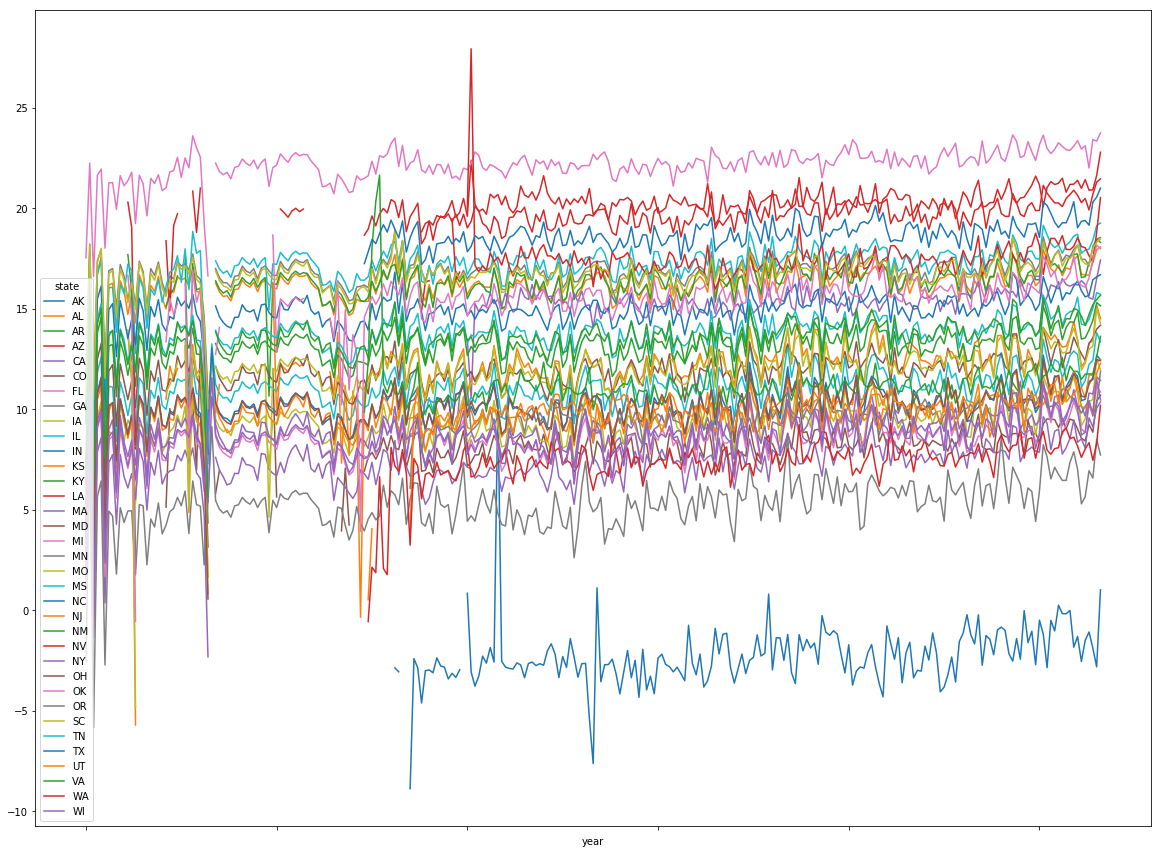

In [36]:
# plot data
fig, ax = plt.subplots(figsize=(20,15))
temp_county.groupby(['year','state']).mean()['AverageTemperature'].unstack().plot(ax=ax)

In [48]:
central_region = temp_county[temp_county['state'].isin(['IL','IN','KY','MO','OH','TN','WV'])]
east_north_central_region = temp_county[temp_county['state'].isin(['IA','MI','MN','WI'])]
northeast_region = temp_county[temp_county['state'].isin(['CT','DE','ME','MD','MA','NH','NJ','NY','PA','RI','VT'])]
northwest_region = temp_county[temp_county['state'].isin(['ID','OR','WA'])]
south_region = temp_county[temp_county['state'].isin(['AR','KS','LA','MS','OK','TX'])]
southeast_region = temp_county[temp_county['state'].isin(['AL','FL','GA','NC','SC','VA'])]
southwest_region = temp_county[temp_county['state'].isin(['AZ','CO','NM','UT'])]
west_region = temp_county[temp_county['state'].isin(['CA','NV'])]
west_north_central_region = temp_county[temp_county['state'].isin(['MT','NE','ND','SD','WY'])]

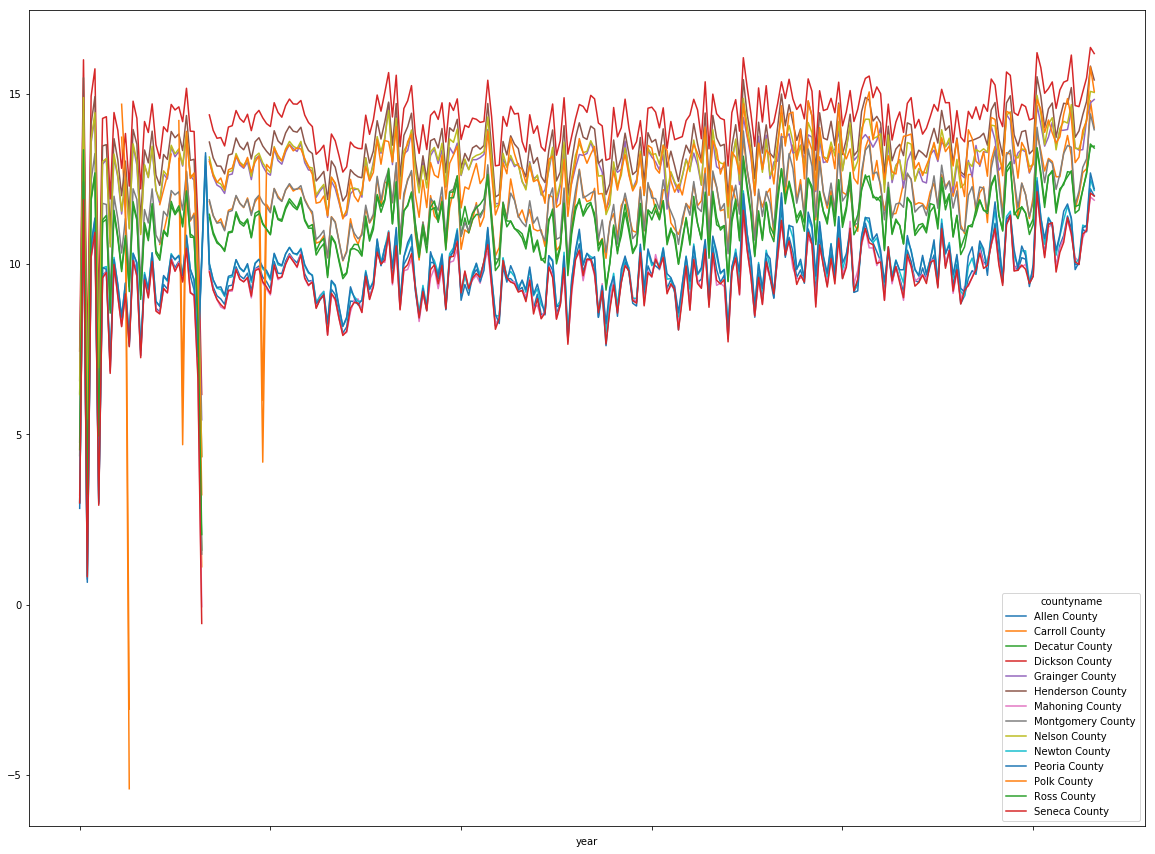

In [50]:
# average yearly temperature in different counties in the central region
fig, ax = plt.subplots(figsize=(20,15))
central_region.groupby(['year','countyname']).mean()['AverageTemperature'].unstack().plot(ax=ax)

In [ ]:
region_temp_county = temp_county.copy()
region_temp_county[region] =  